## Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)

In [2]:
df=pd.read_csv('train_black_friday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

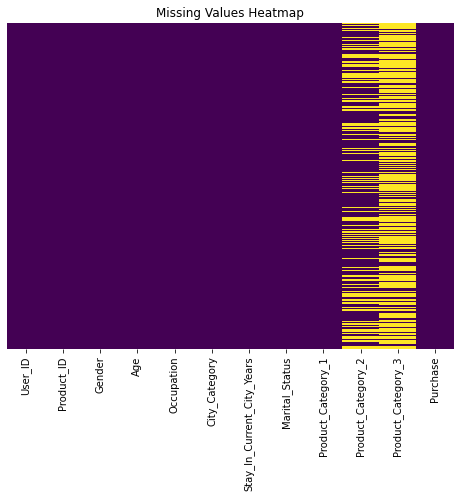

In [6]:
# Generate a heatmap for missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<AxesSubplot:xlabel='Product_Category_2'>

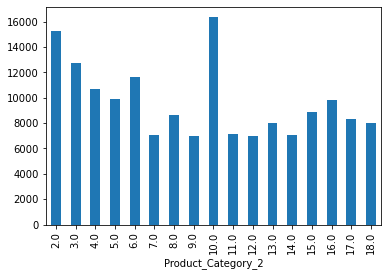

In [8]:
# Check  the Product_Category_2 and Product_Category_3 feature w.r.t the dependent variable Purchase
df.groupby('Product_Category_2')['Purchase'].median().plot.bar()

<AxesSubplot:xlabel='Product_Category_3'>

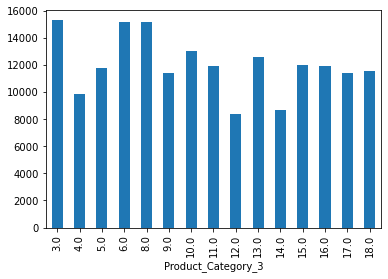

In [9]:
df.groupby('Product_Category_3')['Purchase'].median().plot.bar()

In [11]:
df['Product_Category_2'].mode()[0]

8.0

In [12]:
#fill discrete categorical features with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [13]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df.shape

(550068, 12)

In [16]:
df1=df.copy()

In [17]:
cat_feat=[f for f in df1.columns if df1[f].dtypes=='O']

In [20]:
cat_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [21]:
df1[cat_feat]

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [22]:
cat_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [24]:
cat_feat.remove('Product_ID')

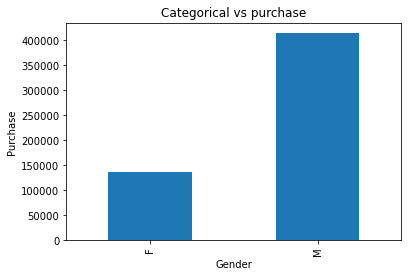

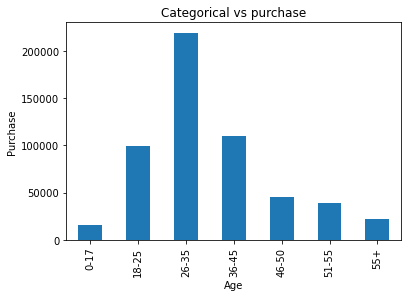

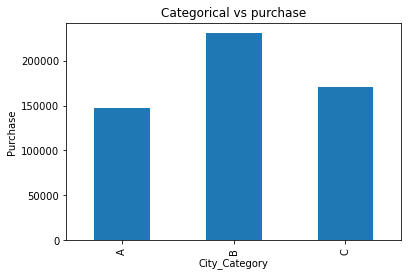

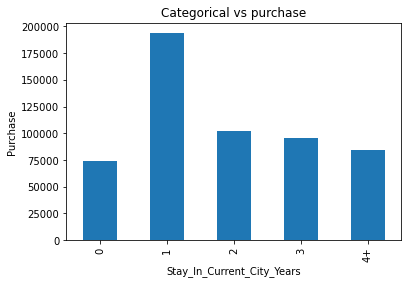

In [25]:
# Check relationship of categorical features w.r.t dependent variable (Purchase)
for f in cat_feat:
    df1.groupby(f)['Purchase'].count().plot.bar()
    plt.title('Categorical vs purchase')
    plt.ylabel('Purchase')
    plt.show()

In [26]:
num_feat=[f for f in df1.columns if df1[f].dtypes!='O']

In [27]:
num_feat

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [28]:
num_feat=[f for f in num_feat if f!='User_ID' and f!='Purchase']

In [29]:
df1[num_feat]

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,10,0,3,8.0,16.0
1,10,0,1,6.0,14.0
2,10,0,12,8.0,16.0
3,10,0,12,14.0,16.0
4,16,0,8,8.0,16.0
...,...,...,...,...,...
550063,13,1,20,8.0,16.0
550064,1,0,20,8.0,16.0
550065,15,1,20,8.0,16.0
550066,1,0,20,8.0,16.0


C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


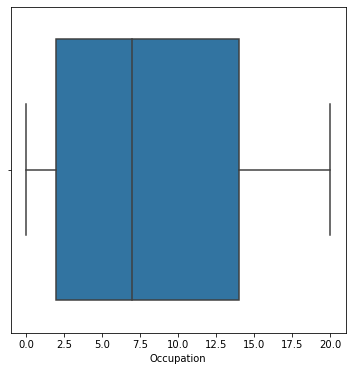

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


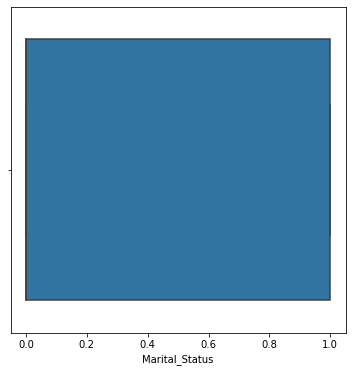

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


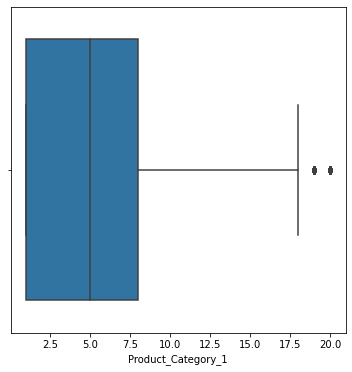

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


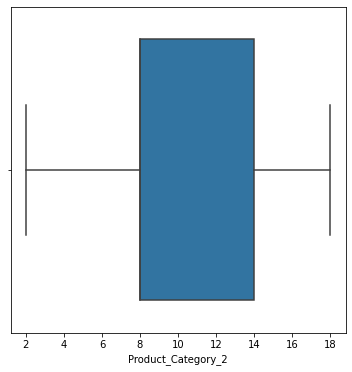

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


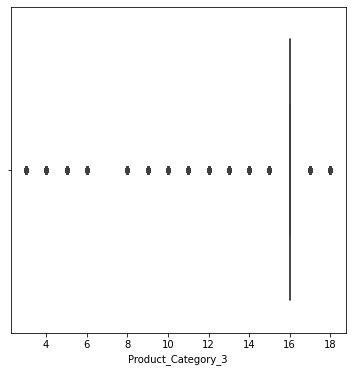

In [31]:
# Check Outliers 
for f in num_feat:
    plt.figure(figsize=(6,6))
    sns.boxplot(df1[f])
    plt.xlabel(f)
    plt.show()

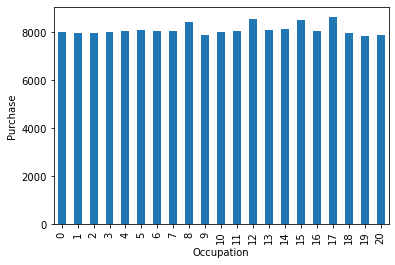

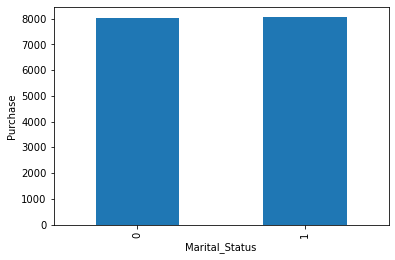

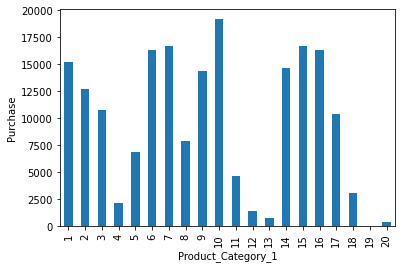

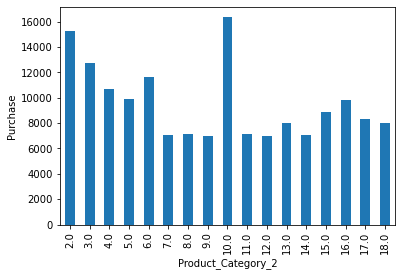

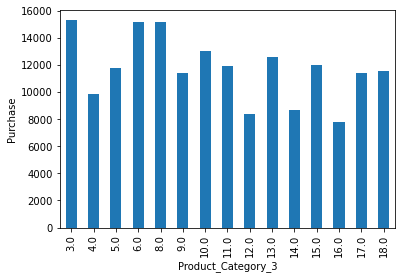

In [30]:
# Check relationship between numerical features w.r.t dependent variable (Purchase)
for f in num_feat:
    df.groupby(f)['Purchase'].median().plot.bar()
    plt.ylabel('Purchase')
    plt.show()

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [33]:
# convert object to int
df1['Gender']=df1['Gender'].map({'F':0,'M':1})

In [35]:
df1['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [38]:
df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [39]:
df1['Age']=df1['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


In [42]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [45]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [46]:
dff=pd.concat([df1,df_city],axis=1)

In [47]:
dff.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1


In [48]:
dff.drop('City_Category',axis=1,inplace=True)

In [49]:
dff['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [53]:
dff['Stay_In_Current_City_Years']=dff['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Nikita\AppData\Local\Temp/ipykernel_25292/600351864.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dff['Stay_In_Current_City_Years']=dff['Stay_In_Current_City_Years'].str.replace('+','')


In [55]:
dff['Stay_In_Current_City_Years'].astype(int)

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int32

In [56]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  B                           550068 non-null  uint8  
 12  C                           550068 non-null  uint8  
dtypes: float64(2),

In [57]:
dff['B']=dff['B'].astype(int)

In [58]:
dff['C']=dff['C'].astype(int)

In [59]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  B                           550068 non-null  int32  
 12  C                           550068 non-null  int32  
dtypes: float64(2),

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

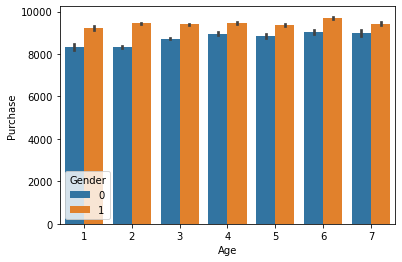

In [61]:
# Age w.r.t Purchase
sns.barplot('Age','Purchase',hue='Gender',data=dff)

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

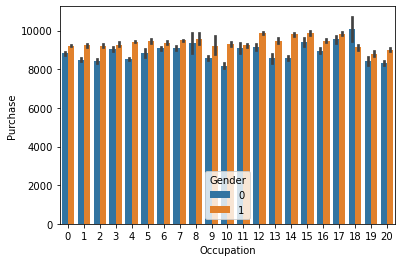

In [62]:
# Occupation w.r.t Purchase
sns.barplot('Occupation','Purchase',hue='Gender',data=dff)

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

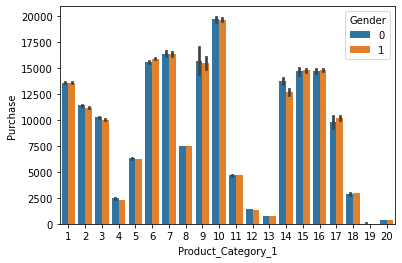

In [63]:
# Product_Category_1 w.r.t Purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=dff)

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

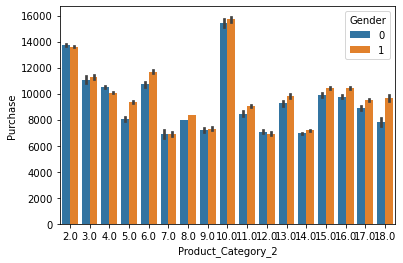

In [64]:
# Product_Category_2 w.r.t Purchase
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=dff)

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

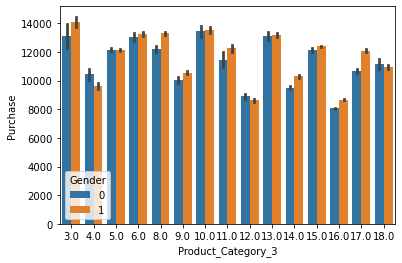

In [65]:
# Product_Category_3 w.r.t Purchase
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=dff)

In [72]:
# Product_ID is of no use:
dff.drop('Product_ID',axis=1,inplace=True)

In [73]:
x=dff.copy()

In [74]:
x.drop('Purchase',axis=1,inplace=True)

In [75]:
y=dff['Purchase']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [80]:
# Feature Scaling preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
ss=preprocessing.StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.fit_transform(x_test)